# ElasticNet Regression

ElasticNet combines the properties of both Ridge(L2) and Lasso (L1) regression to get the final LOSS function.

It works by penelizing the model using both the L2-norm and the L1-nortm

Where alpha is between 1 and 0
 - Alppha = 1, it reduces the penalty term to L1 penalty (Laso Regression)
 - Alpha = 0, it reduces the penalty term to L2 penalty (Ridge Regession)

In [2]:
# import libraries
import pandas as pd

In [11]:
# load in the dataset
df = pd.read_csv('boston.csv')
df = df.drop('Unnamed: 0', axis=1)

In [12]:
# print first 5 rows of the dataframe
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
# Get statistical information
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
# check shape of the dataframe
df.shape

(506, 14)

In [22]:
# check for null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [15]:
# Split dataset into independent and depndent features

# independent features
X = df.drop('medv', axis=1)

# dependent features
y = df['medv']

In [16]:
# check independent dataframe
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [18]:
# check dependent dataframe
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [20]:
# check shape of the dataframe
df.shape

(506, 14)

In [31]:
# Split datasit into X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

### Change parameters

In [158]:
# Import Elastic Net Regression
from sklearn.linear_model import ElasticNet

#Train the model
#e_net = ElasticNet (alpha=0, l1_ratio=0)
e_net = ElasticNet (alpha=1, l1_ratio=1)
e_net.fit(X_train, y_train)

ElasticNet(alpha=1, l1_ratio=1)

The alpha hyperparameter can be set via the l1_ratio argument that controls the contribution of the L1 and the L2 penalties and the lambda hyperparameter can be set via the alpha arguemnt that controls the contribution of the sum of both penalties to th e loss function.

By default an equal balance of 0.5 is used for L1_ratio and a full weighting of 1.0 is used for alpha

### train_score on the train data

In [159]:
# Train score on train_data
train_score = round(e_net.score(X_train, y_train)*100,2)
print('Train score of Enet Regression', train_score)

Train score of Enet Regression 70.98


### Let's check how well the model fitss the test data

Now lets check if our model is overfitting our data using regularization

In [160]:
#predicted values
en_y_pred = e_net.predict(X_test)

In [161]:
from sklearn.metrics import r2_score
score = round(r2_score(y_test, en_y_pred)*100,2)
print("r2_score of ENet", score)

r2_score of ENet 64.14


In [162]:
round(e_net.score(X_test, y_test)*100,2)

64.14

### NOTE:
1. In ElasticNet (Alpha=1 & L1_ratio = 1), Train score = 70.98 & Test Score(R2_score) = 64.14
which is same as LASSO (ALPHA=1), Train Score = 70.89 & Test Score (R2_score) = 65.14
2. In ElasticNet (Alpha=0 & L1_ratio = 0), Train score = 76.99 & Test Score(R2_score) = 57.85
which is same as LASSO (ALPHA=0), Train Score = 76.99 & Test Score (R2_score) = 57.85

In [163]:
from sklearn import metrics
import numpy as np
print("Mean Absolute Error on TEST DATA of ENEt Regression:", metrics.mean_absolute_error(y_test, en_y_pred))
print("Mean Squared Error on TEST DATA of ENEt Regression:", metrics.mean_squared_error(y_test, en_y_pred))
print("Root Mean Squared Error on TEST DATA of ENEt Regression:", np.sqrt(metrics.mean_squared_error(y_test, en_y_pred)))

Mean Absolute Error on TEST DATA of ENEt Regression: 3.5891299041596185
Mean Squared Error on TEST DATA of ENEt Regression: 28.978052795642775
Root Mean Squared Error on TEST DATA of ENEt Regression: 5.383126674679203


So it looks like our model r2 score is less on the test data

In [164]:
# Creates a dataframe with the actuals, predicted and the variance
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': en_y_pred, 'Variance': y_test-en_y_pred})

In [165]:
# print 14 rows of the dataframe
df.head(14)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [166]:
e_net.predict(([[0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21,396.9,8.26]]))

array([22.76947516])

In [167]:
e_net.intercept_

31.528413056972447

In [168]:
e_net.coef_

array([-0.05652723,  0.03434601, -0.        ,  0.        , -0.        ,
        2.14646291,  0.01949615, -0.49480838,  0.22213382, -0.01471221,
       -0.68883051,  0.00799949, -0.65976277])

In [170]:
# get linear coefficient and print them
en_coefficient = pd.DataFrame()
en_coefficient['Columns'] = X_train.columns
en_coefficient['Coefficient Estimate'] = pd.Series(e_net.coef_)
print("coefficients w hen alpha=1: \n", en_coefficient)

coefficients w hen alpha=1: 
     Columns  Coefficient Estimate
0      crim             -0.056527
1        zn              0.034346
2     indus             -0.000000
3      chas              0.000000
4       nox             -0.000000
5        rm              2.146463
6       age              0.019496
7       dis             -0.494808
8       rad              0.222134
9       tax             -0.014712
10  ptratio             -0.688831
11    black              0.007999
12    lstat             -0.659763


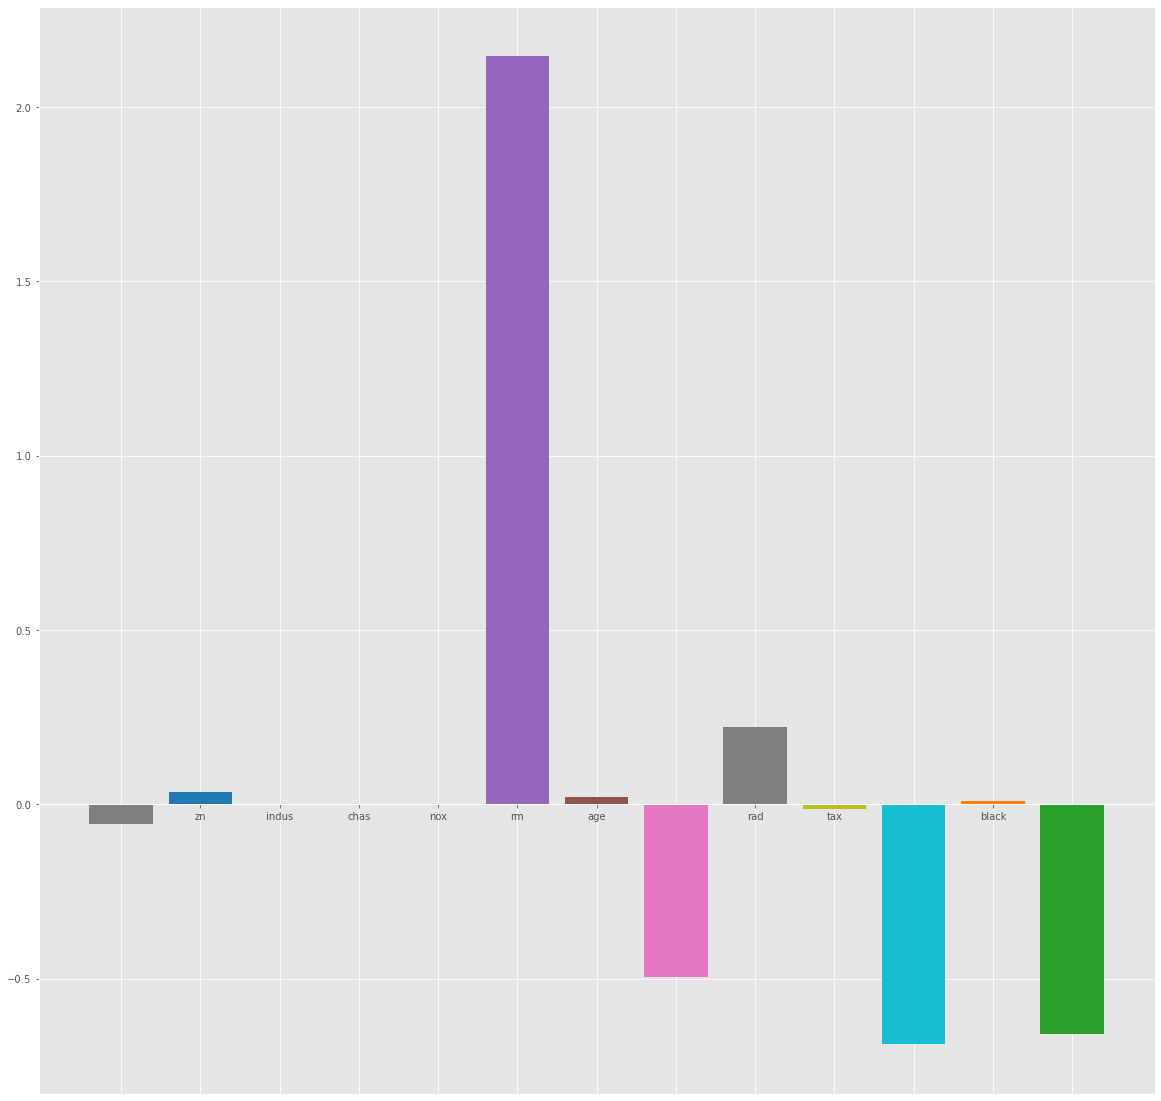

In [171]:
### Lets plot a bar chart above coefficients using matplotlib library
import matplotlib.pyplot as plt

#plotting the coefficient score
fix, ax = plt.subplots(figsize=(20,20))
color=['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple',
'tab:brown', 'tab:pink', 'tab:gray',
'tab:olive', 'tab:cyan','tab:orange', 
'tab:green', 'tab:blue', 'tab:olive']

ax.bar(en_coefficient['Columns'],
en_coefficient['Coefficient Estimate'], color=color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')

plt.show()

**Obeservation**

AS we can observe from the abobe plots that \alpha helps in regularizing the coefficient and make them converge gaster
in LASSO Regularization, the coefficients can be 0





















In [172]:
# Saving the model to the folder path
import pickle
filename = 'linear_model.pkl'
pickle.dump(e_net, open(filename,'wb'))

In [173]:
# Prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))

a = loaded_model.predict([[0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21,396.9,8.26]])
print("Predicted value will be :\n", a)

Predicted value will be :
 [22.76947516]


In [174]:
### To figure out what alpha value is good for our model, we will define multiple values and check the performance accuracy
alphas = [0,0.0001,0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,10]

We define ElasticNet model by setting alpha and train it with x and y data

Then we will check the R-squared, MSE, and RMSE metrics for each alpha

<ipython-input-175-f203f9f962e2>:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\prash\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
C:\Users\prash\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3967.020896897835, tolerance: 3.4473845024752476


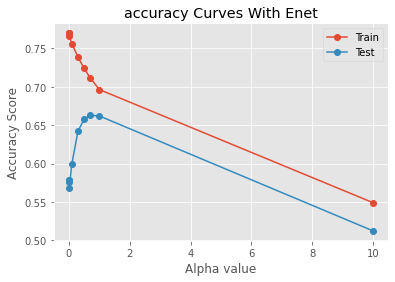

In [175]:
from plotnine import *
import plotnine
from sklearn.metrics import mean_squared_error, mean_absolute_error
# define lists to collect scores
train_scores, test_scores = list(), list()
#define the tree depths to evaluate
values = [i for i in [0,0.0001,0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1,10]]

for i in values:
    # configure the model
    model = ElasticNet(alpha=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = r2_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # Evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = r2_score(y_test, test_yhat)
    test_scores.append(test_acc)
    diff = train_acc - test_acc
    
    pred_y = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred_y)
    mse = mean_squared_error(y_test, pred_y)
    
#plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label="Train")
plt.plot(values, test_scores, '-o', label='Test')
plt.title("accuracy Curves With Enet")
plt.xlabel("Alpha value")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

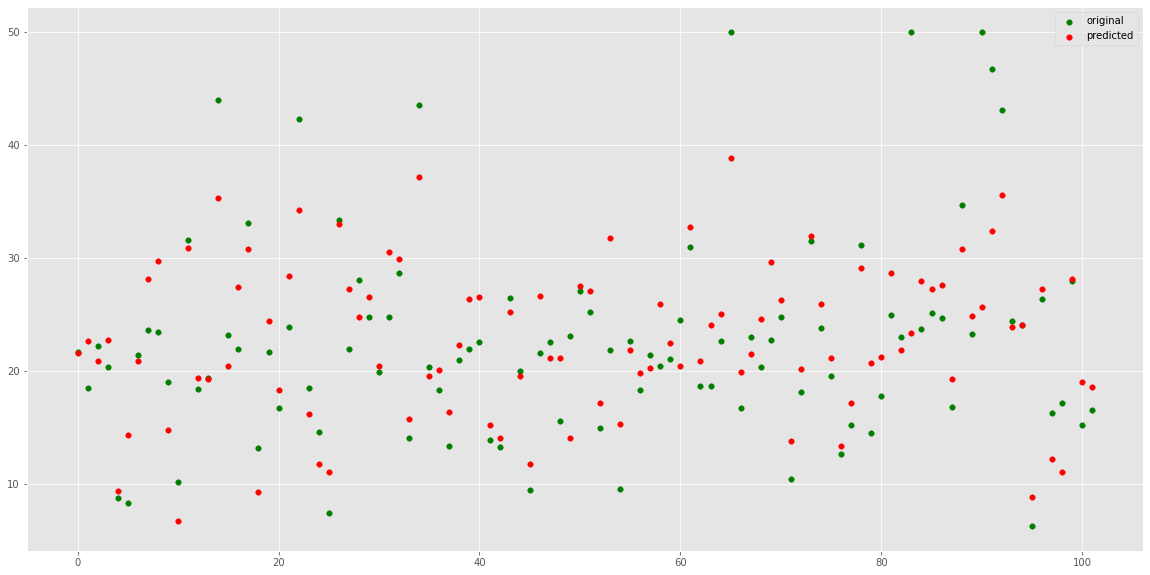

In [176]:
fig, ax = plt.subplots(figsize=(20, 10))
X_ax = range(len(X_test))
plt.scatter(X_ax, y_test, s=30, color='green', label='original')
plt.scatter(X_ax, en_y_pred, s=30, color='red', label='predicted')
plt.legend()
plt.show()

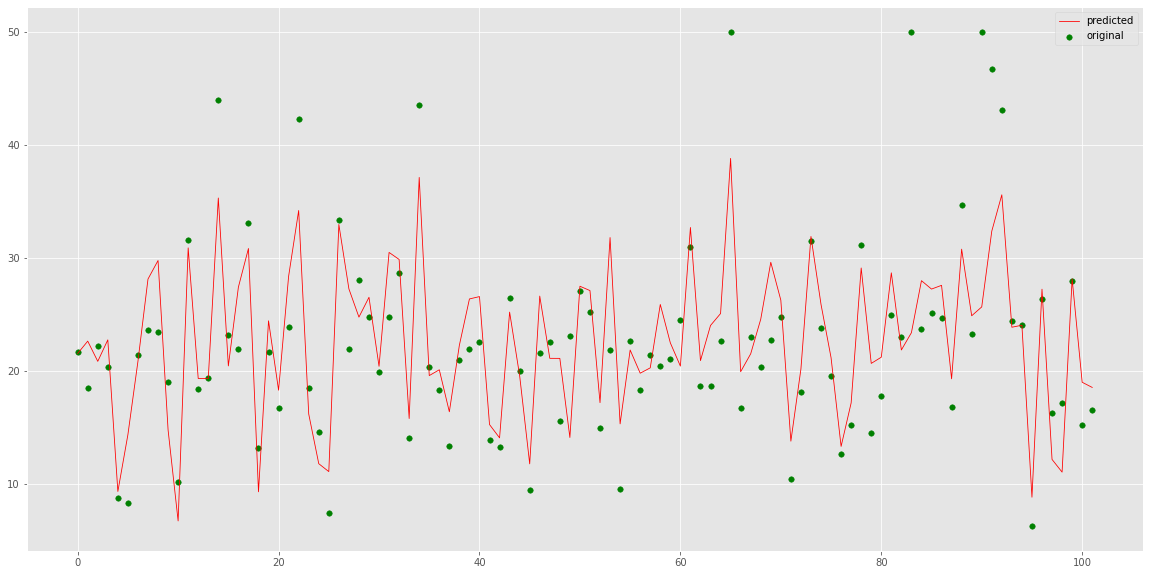

In [177]:
fig, ax = plt.subplots(figsize=(20, 10))
X_ax = range(len(X_test))
plt.scatter(X_ax, y_test, s=30, color='green', label='original')
plt.plot(X_ax, en_y_pred, lw=0.8, color='red', label='predicted')
plt.legend()
plt.show()

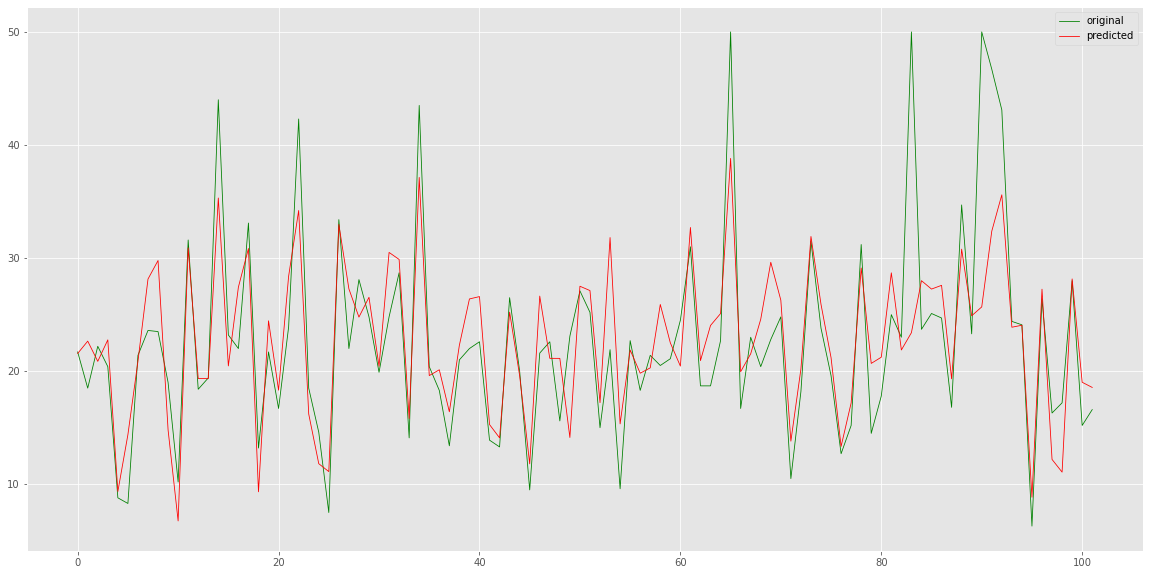

In [178]:
fig, ax = plt.subplots(figsize=(20, 10))
X_ax = range(len(X_test))
plt.plot(X_ax, y_test, lw=0.8, color='green', label='original')
plt.plot(X_ax, en_y_pred, lw=0.8, color='red', label='predicted')
plt.legend()
plt.show()